In [3]:
# Importations des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Chargement du Dataset
data = pd.read_csv('CO2_emission.csv')
# Vérification des valeurs manquantes NaN
print(data.isna)
# Nettoyage du Dataset
data = data.dropna()


<bound method DataFrame.isna of      Country Name country_code                      Region  \
0           Aruba          ABW   Latin America & Caribbean   
1     Afghanistan          AFG                  South Asia   
2          Angola          AGO          Sub-Saharan Africa   
3         Albania          ALB       Europe & Central Asia   
4         Andorra          AND       Europe & Central Asia   
..            ...          ...                         ...   
210         Samoa          WSM         East Asia & Pacific   
211   Yemen, Rep.          YEM  Middle East & North Africa   
212  South Africa          ZAF          Sub-Saharan Africa   
213        Zambia          ZMB          Sub-Saharan Africa   
214      Zimbabwe          ZWE          Sub-Saharan Africa   

                             Indicator Name      1990      1991      1992  \
0    CO2 emissions (metric tons per capita)       NaN       NaN       NaN   
1    CO2 emissions (metric tons per capita)  0.191745  0.167682  0.09

In [5]:
# Afficher entête du dataset
data.head()

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,1.692248
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,...,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217,6.481217
5,United Arab Emirates,ARE,Middle East & North Africa,CO2 emissions (metric tons per capita),30.195189,31.778496,29.080926,29.275678,30.849333,31.125018,...,18.509457,19.207801,20.055648,20.051698,21.077642,21.480669,20.769022,18.390678,19.329563,19.329563


In [6]:
print(data["Country Name"].value_counts())

Country Name
Afghanistan             1
Angola                  1
Albania                 1
Andorra                 1
United Arab Emirates    1
                       ..
Samoa                   1
Yemen, Rep.             1
South Africa            1
Zambia                  1
Zimbabwe                1
Name: count, Length: 183, dtype: int64


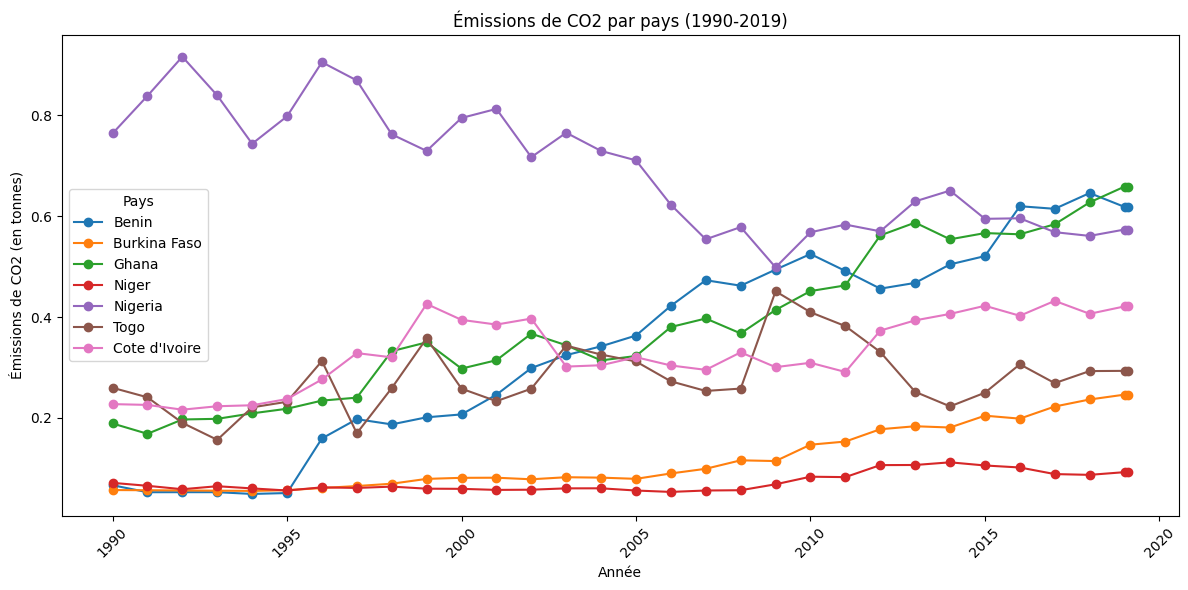

In [7]:
plt.figure(figsize=(12, 6))

# Liste des pays à tracer
countries = ["Benin", "Burkina Faso", "Ghana", "Niger", "Nigeria", "Togo", "Cote d'Ivoire"]


df_melted = data.melt(id_vars=['Country Name', 'country_code', 'Region', 'Indicator Name'], 
                     var_name='Année', 
                     value_name='Emissions_CO2')

# Convertir la colonne Année en type numérique
df_melted['Année'] = pd.to_numeric(df_melted['Année'], errors='coerce')
for country in countries:
    if country in df_melted['Country Name'].values: 
        subset = df_melted[df_melted['Country Name'] == country]
        plt.plot(subset['Année'], subset['Emissions_CO2'], marker='o', label=country)

plt.title('Émissions de CO2 par pays (1990-2019)')
plt.xlabel('Année')
plt.ylabel('Émissions de CO2 (en tonnes)')
plt.legend(title='Pays')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("EmissionCo2_Ligne.png")
plt.show()
